# 特征工程

In [3]:
# 导入需要的包
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer

## 特征抽取
transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值,不会重新计算均值方差

In [4]:
def dictvec():
    """
    字典数据抽取
    :return: None
    """
    # 实例化
    # sparse(adj. 稀少的，稀疏的；简朴的)改为True, 输出的是每个不为零位置的坐标，稀疏矩阵可以节省存储空间, 但模型不接受稀疏编码
    # 矩阵中存在大量的0，sparse存储只记录非零位置，节省空间的作用
    # Vectorizer中文含义是矢量器的含义
    dict1 = DictVectorizer(sparse=True)  # 把sparse改为Flase为稠密矩阵(one-hot编码形式即独热码) 

    # 每个样本都是一个字典，有三个样本
    # 调用fit_transform
    data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                               {'city': '上海', 'temperature': 60},
                               {'city': '深圳', 'temperature': 30}])
    print(data)
    print('-' * 50)

    # 字典中的一些类别数据，分别进行转换成特征
    print(dict1.get_feature_names_out())
    print('-' * 50)

    print(dict1.inverse_transform(data))  #去看每个特征代表的含义，逆转回去
    return None

dictvec()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': np.float64(1.0), 'temperature': np.float64(100.0)}, {'city=上海': np.float64(1.0), 'temperature': np.float64(60.0)}, {'city=深圳': np.float64(1.0), 'temperature': np.float64(30.0)}]


##  一段英文文本变为数值类型

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def couvec():
    """
    实例化CountVectorizer
    max_df, min_df整数：指每个词的所有文档词频数不小于最小值，出现该词的文档数目小于等于max_df
    max_df, min_df小数(0-1之间的）：某个词的出现的次数／所有文档数量
    min_df=2：默认会去除单个字母的单词，默认认为这个词对整个样本没有影响,认为其没有语义
    :return: 
    """
    vector = CountVectorizer(min_df=2)

    # 调用fit_transform输入并转换数据
    res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])

    # 打印结果,把每个词都分离了
    print("Features:", vector.get_feature_names_out())
    print('-' * 50)
    print("Sparse matrix representation:")
    print(res)
    print('-' * 50)
    print("Type of result:", type(res))
    
    # 对照feature_names，标记每个词出现的次数
    print('-' * 50)
    print("Array form:")
    print(res.toarray())  # 稀疏矩阵转换为数组
    print('-' * 50)
    
    # 拿每个样本里的特征进行显示
    print("Inverse transform result:")
    print(vector.inverse_transform(res))

couvec()


Features: ['is' 'life' 'python' 'short']
--------------------------------------------------
Sparse matrix representation:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
Type of result: <class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
Array form:
[[1 2 1 1]
 [1 1 1 0]
 [1 1 0 1]]
--------------------------------------------------
Inverse transform result:
[array(['life', 'is', 'short', 'python'], dtype='<U6'), array(['life', 'is', 'python'], dtype='<U6'), array(['life', 'is', 'short'], dtype='<U6')]


##  一段中文文本变为数值类型

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

def countvec():
    """
    对文本进行特征值化，单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    cv = CountVectorizer()  # 初始化 CountVectorizer，用于将文本转换为词频矩阵

    # 输入的文本数据，包含两个句子
    data = cv.fit_transform(["人生苦短，我 喜欢 python python", "人生漫长，不用 python"])

    # 输出词汇表：即所有文档中出现的特征单词
    print(cv.get_feature_names_out())  # 打印所有特征词（词汇表）

    print('-'*50) 
    # 输出稀疏矩阵，显示每个文档中每个词的频次
    print(data)  # 输出稀疏矩阵，仅存储非零的词频位置
    print('-'*50) 
    # 将稀疏矩阵转换为密集的数组形式，便于查看每个词在每个文档中的频次
    print(data.toarray())  
    return None 

# 调用函数执行
countvec()

['python' '不用' '人生漫长' '人生苦短' '喜欢']
--------------------------------------------------
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (2, 5)>
  Coords	Values
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


## jieba分词

In [10]:

def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 转换成列表
    print(type(con1))
    print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    print(content1)
    print(content2)
    print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    print('-' * 50)
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3


def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword() #jieba分词好的中文文本
    print('-'*50)
    print(c1)
    print(c2)
    print(c3)
    print('-'*50)

    cv = CountVectorizer()

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())

    print(data.toarray())

    return None

cutword()
hanzivec()

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是

## tf-idf算法

In [11]:
# 规范 {'l1', 'l2'}，默认 = 'l2'
# 'l2'：向量元素的平方和为 1。使用 l2 范数时，两个向量之间的余弦相似度为它们的点积。
# 'l1'：向量元素的绝对值之和为 1。参见 preprocessing.normalize。
# smooth_idf：布尔值，默认 = True
# 如果为 True，通过在文档频率上加一来平滑 idf 权重，避免零分裂的情况。
# 例如：若训练集中包含某个词，但测试集中没有该词（即生僻词），可能会导致分母为零，出现 "log(n/n(x))" 时出现零分裂。

def tfidfvec():
    """
    中文特征值化，计算 TF-IDF 值
    tf: 词的频率出现的次数 term frequency
    idf: 逆文档频率 inverse document frequency -> log10( 总文档数量 / 该词出现的文档数量 ) 
    tf*idf 来代表重要性程度 :
    :return: None
    """

    c1, c2, c3 = cutword()  # cutword()返回分词后的文本数据

    print(c1, c2, c3)
    # print(type([c1, c2, c3]))

    # 初始化 TfidfVectorizer，设置平滑 idf 权重 (log10( 总文档数量 / 该词出现的文档数量 ) + 1)
    tf = TfidfVectorizer(smooth_idf=True)

    # 对文本数据进行特征值化处理，返回 TF-IDF 矩阵
    data = tf.fit_transform([c1, c2, c3])

    # 输出特征词汇表（即每个文档中出现的词）
    print(tf.get_feature_names_out())
    print('-' * 50)

    # 输出数据类型，检查返回的是稀疏矩阵
    print(type(data))
    print('-' * 50)

    # 输出数据的稠密矩阵形式，查看每个文档中每个特征的 TF-IDF 值
    print(data.toarray())

    return None

tfidfvec()

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '

## 特征处理
### 归一化

In [14]:
from sklearn.preprocessing import MinMaxScaler

def mm():
    """
    归一化处理
    :return: None
    """
    # 归一化的缺点：容易受极值的影响（例如，数据中的异常值会影响缩放效果）
    
    # feature_range代表特征值范围，一般设置为(0, 1) 或者 (-1, 1)，默认值是(0, 1)
    # MinMaxScaler 会将每个特征值缩放到该范围内（按列独立处理）
    mm = MinMaxScaler(feature_range=(0, 1))  # 初始化 MinMaxScaler，设置特征值范围为(0, 1)

    # fit_transform：计算训练集数据的最小值和最大值，并使用这些值来对数据进行归一化处理
    data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])

    # 打印归一化后的数据
    print(data)
    print('-' * 50)

    # transform：使用已经通过fit计算的最小值和最大值，对新的数据进行归一化
    # 注意：transform不会重新计算数据中的最小值和最大值，只使用训练集的值
    out = mm.transform([[1, 2, 3, 4], [6, 5, 8, 7]])
    
    # 打印归一化后的新数据
    print(out)
    return None

# 调用函数执行
mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


### 标准化

In [16]:
from sklearn.preprocessing import StandardScaler

def stand():
    """
    标准化处理，将数据转换为均值为0，方差为1的分布
    注意：标准化处理并不意味着数据是标准正态分布，而是使得数据的均值为0，方差为1。
    :return: 标准化后的数据
    """
    std = StandardScaler()  # 初始化 StandardScaler，用于标准化处理

    # fit_transform：计算数据的均值和标准差，并对数据进行标准化处理
    data = std.fit_transform([[1., -1., 3.],  
                              [2., 4., 2.],   
                              [4., 6., -1.]])  # 每列是一个特征

    # 输出标准化后的数据
    print(data)
    print('-' * 50)

    # 输出标准化后的数据均值（每列的均值应该为0）
    print(std.mean_)
    print('-' * 50)

    # 输出标准化后的数据方差（每列的方差应该为1）
    print(std.var_)  # 方差
    print(std.n_samples_seen_)  # 样本数（fit过程中的样本数）
    
    return data  # 返回标准化后的数据

# 调用函数并获取标准化后的数据
data = stand()

[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


In [20]:
std1 = StandardScaler()
#为了证明上面输出的结果的均值是为0的，方差为1
data1 = std1.fit_transform([[-1.06904497, -1.35873244, 0.98058068],
                            [-0.26726124, 0.33968311, 0.39223227],
                            [1.33630621, 1.01904933, -1.37281295]])
# 均值
print(std1.mean_)
# 方差
print(std1.var_)

[0. 0. 0.]
[1.         1.         1.00000001]


In [21]:
# 计算方差
fangcha = (np.square(1-2.333) + np.square(2-2.333) + np.square(4-2.333)) / 3
print(f"方差：{fangcha}")
# 计算标准差
biaozhuncha = (1 - 2.333) / np.sqrt(1.55555)
print(f"标准差：{biaozhuncha}")

方差：1.5555556666666668
标准差：-1.068779614944516


### 缺失值处理

In [8]:
#下面是填补，针对删除，可以用pd和np
def im():
    """
    缺失值处理
    :return:None
    """
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)
    return None

im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


## 特征数降维

In [22]:
def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)
    print('-' * 50)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None

var()

[[2 0]
 [1 4]
 [1 1]]
--------------------------------------------------
The surport is [1 2]


In [25]:
import numpy as np
from sklearn.decomposition import PCA

def pca():
    """
    主成分分析（PCA）进行特征降维
    :return: None
    """
    # n_components：如果是小数（0~1之间），表示希望保留的主成分解释的方差比例。
    # 例如 n_components=0.9 表示选择足够的主成分，以使它们解释数据方差的90%。
    # 如果 n_components 是整数，则表示要减少到的特征数量。

    # 示例数据：每列代表一个特征，每行代表一个样本
    original_value = np.array([[2, 8, 4, 5],
                               [6, 3, 0, 8],
                               [5, 4, 9, 1]])

    # 输出原始数据每一列的方差并求和，计算总方差
    print(np.var(original_value, axis=0).sum())  # 计算每列的方差并求和
    print('-' * 50)

    # 初始化PCA，保留足够的主成分来解释99%的方差
    pca = PCA(n_components=0.99)

    # 使用PCA对数据进行降维
    data = pca.fit_transform(original_value)

    # 输出降维后的数据
    print(data)
    print(type(data))  # 输出降维后的数据类型，应该是 numpy 数组
    print('-' * 50)

    # 输出降维后的数据方差和
    print(np.var(data, axis=0).sum())  # 计算降维后的数据每一列方差的和
    print('-' * 50)

    # 输出每个主成分解释的方差比例
    print(pca.explained_variance_ratio_)

    # 输出所有主成分解释的总方差比例
    print(pca.explained_variance_ratio_.sum())

    return None

# 调用函数进行PCA降维
pca()

29.333333333333336
--------------------------------------------------
[[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
--------------------------------------------------
29.333333333333346
--------------------------------------------------
[0.75 0.25]
1.0


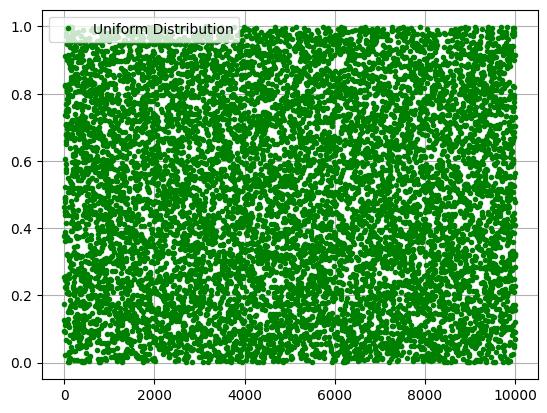

In [26]:
# 均匀分布
from matplotlib import pyplot as plt

x = np.random.rand(10000)  #每个的概率
t = np.arange(len(x))
plt.plot(t, x, 'g.', label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()